# Week 6 Assignment - PCA and k-means dimensionality reduction

# INGRESS

In [ ]:
# import libraries
import pandas as pd
from pandas.core.series import Series

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sys
#import statsmodels.api as sm
import math
import random

from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#from sklearn.metrics import zero_one_loss

#from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import confusion_matrix

#import pylab
#from pylab import hist, show, xticks
#from sklearn.cluster import KMeans
#from scipy.spatial.distance import cdist
#from scipy import optimize
#from scipy import interpolate
#from numpy.linalg import lstsq
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from pprint import pprint
from datetime import datetime

In [ ]:
# get training data
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [ ]:
origDF = pd.read_csv('train.csv')

# BASIC RANDOM FOREST MODELING

In [ ]:
# inspect columns
pd.set_option('display.max_columns', None)  # display all the columns
origDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [ ]:
# get statistics of each column
origDF.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
origDF.shape

(42000, 785)

In [ ]:
print('There are', np.sum(origDF.isnull().sum()), 'missing values in the training data.')

There are 0 missing values in the training data.


**Summary of initial data inspection:**

The label column is essentially the response variable (i.e., which digit) and varies from 0 to 9

For each digit sample, there are 784 pixels (pixel0 to pixel783).

**RandomForestClassifier using original training data**

In [ ]:
# extract response variable ('label') from dataset
yDF = origDF['label']
Xdf = origDF.copy()
Xdf = Xdf.drop(columns=['label'], axis=1)

In [ ]:
# define parameter ranges to be tested in random grid search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# which criterion to decide whether to split
criterion = ['gini','entropy']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

# verify grid parameters
print('These are the parameter ranges:\n')
pprint(random_grid)

These are the parameter ranges:

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [ ]:
# use the random grid to search for best hyperparameters

# create the base model to tune
rfc = RandomForestClassifier(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50,
                               cv = 3, verbose=2, random_state=42)

# Fit the random search model
rfc_random.fit(Xdf, yDF)

# view the best parameters obtained from above search:
print('The best parameters obtained from the random search are:\n',rfc_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  52.4s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  54.3s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  45.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  20.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  20.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=  20.3s
[CV] END bootstra

In [ ]:
# use previous results to define parameter ranges in the next random grid search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 1400, num = 4)]

# which criterion to decide whether to split
criterion = ['gini','entropy']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)
max_depth = [16,20,24]

# Minimum number of samples required to split a node
min_samples_split = [3, 4, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Number of features to consider at every split
max_features = ['sqrt']

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

# verify grid parameters
print('These are the parameter ranges:\n')
pprint(random_grid)

These are the parameter ranges:

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [16, 20, 24],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [3, 4, 5],
 'n_estimators': [800, 1000, 1200, 1400]}


In [ ]:
# use the random grid to search for best hyperparameters

# create the base model to tune
rfc = RandomForestClassifier(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 15,
                               cv = 3, verbose=2, random_state=123)

# Fit the random search model
rfc_random.fit(Xdf, yDF)

# view the best parameters obtained from above search:
print('The best parameters obtained from the random search are:\n',rfc_random.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time= 2.5min
[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time= 2.5min
[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=False, criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1400; total time= 5.6min
[CV] END bootstrap=False, criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1400; total time= 5.5min
[CV] END bootstrap=False, criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1400; total time= 5.6min
[CV] END bootstrap

In [ ]:
# use previous results to define parameter ranges in the next random grid search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 1800, num = 4)]

# which criterion to decide whether to split
criterion = ['gini']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)
max_depth = [22,24,26]

# Minimum number of samples required to split a node
min_samples_split = [4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Number of features to consider at every split
max_features = ['sqrt']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

# verify grid parameters
print('These are the parameter ranges:\n')
pprint(random_grid)

These are the parameter ranges:

{'bootstrap': [False],
 'criterion': ['gini'],
 'max_depth': [22, 24, 26],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [4],
 'n_estimators': [1200, 1400, 1600, 1800]}


In [ ]:
# use the random grid to search for best hyperparameters

# create the base model to tune
rfc = RandomForestClassifier(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 6,
                               cv = 3, verbose=2, random_state=123)

# Fit the random search model
rfc_random.fit(Xdf, yDF)

# view the best parameters obtained from above search:
print('The best parameters obtained from the random search are:\n',rfc_random.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1400; total time= 4.9min
[CV] END bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1400; total time= 4.8min
[CV] END bootstrap=False, criterion=gini, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1400; total time= 4.8min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 4.3min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 4.2min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time= 4.3min
[CV] END bootstr

In [ ]:
# use previous results to define parameter ranges in the next random grid search

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 1800, num = 4)]
n_estimators = [1600, 1800, 2000]

# which criterion to decide whether to split
criterion = ['gini']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)
max_depth = [24,26,28]

# Minimum number of samples required to split a node
min_samples_split = [4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Number of features to consider at every split
max_features = ['sqrt']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

# verify grid parameters
print('These are the parameter ranges:\n')
pprint(random_grid)

These are the parameter ranges:

{'bootstrap': [False],
 'criterion': ['gini'],
 'max_depth': [24, 26, 28],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [4],
 'n_estimators': [1600, 1800, 2000]}


In [ ]:
# use the random grid to search for best hyperparameters

# create the base model to tune
rfc = RandomForestClassifier(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 6,
                               cv = 3, verbose=2, random_state=123)

# Fit the random search model
rfc_random.fit(Xdf, yDF)

# view the best parameters obtained from above search:
print('The best parameters obtained from the random search are:\n',rfc_random.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END bootstrap=False, criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1800; total time= 6.5min
[CV] END bootstrap=False, criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1800; total time= 6.4min
[CV] END bootstrap=False, criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1800; total time= 6.5min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 7.2min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 7.2min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time= 7.3min
[CV] END bootstr

===========================================================================================

**Use RandomSearchCV results to fit RandomForestClassifier model (using train.csv data) and then evaluate Random Forest model with test.csv data**

In [ ]:
# load test.csv data
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [ ]:
testDF = pd.read_csv('test.csv')
testDF.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
testDF.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
testDF.shape

(28000, 784)

In [ ]:
print('There are', np.sum(origDF.isnull().sum()), 'missing values in the training data.')

There are 0 missing values in the training data.


---------------------------------------------------------------------

**... an attempt to use max_features = None (= all the features) -- it took too long and stopped executing ...**

In [ ]:
# list the parameters to be used and train model
nEstimators = 1800
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = None
bootstrapChoice = False

rfc_None = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice
)
start=datetime.now()
rfcModel_None = rfc_None.fit(Xdf, yDF)
end=datetime.now()
print('Time to train RandomForestModel (original data, with max_features = None) =',end-start)

Execution stopped after 4 hr, 41 minutes

In [ ]:
# list the parameters to be used and train model (max_features = 'sqrt', raw training data)
nEstimators = 1500
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = 'sqrt'
bootstrapChoice = False
nJobs = -1

rfc = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice,
    n_jobs = nJobs
)
start=datetime.now()
rfcModel = rfc.fit(Xdf, yDF)
end=datetime.now()
print('Time to train RandomForestModel (original data) =', end-start)

#----------------------------------------------------------------
# predict digits using trained Random Forest model (max_features = 'sqrt', raw test data)

start=datetime.now()
yTestPredict = rfcModel.predict(testDF)
end=datetime.now()
print('Time to test RandomForestModel (original data) =', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_rawData = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_rawData['ImageId'] = np.arange(start=1, stop=len(digitDF_rawData)+1, step=1)
digitDF_rawData['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_rawData.to_csv('Digit_rawData_sqrt.csv', index=False)

Time to train RandomForestModel (original data) = 0:09:47.333561
Time to test RandomForestModel (original data) = 0:00:13.890470


**Do this again, except use fewer nEstimators and use max_features = None**

In [ ]:
# list the parameters to be used and train model (max_features = 'sqrt', raw training data)
nEstimators = 1200
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = None
bootstrapChoice = False
nJobs = -1

rfc = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice,
    n_jobs = nJobs
)
start=datetime.now()
rfcModel2 = rfc.fit(Xdf, yDF)
end=datetime.now()
print('Time to train RandomForestModel (original data), n_features=None: ', end-start)

#----------------------------------------------------------------
# predict digits using trained Random Forest model (max_features = 'sqrt', raw test data)

start=datetime.now()
yTestPredict = rfcModel2.predict(testDF)
end=datetime.now()
print('Time to test RandomForestModel (original data), n_features=None: ', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_rawData2 = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_rawData2['ImageId'] = np.arange(start=1, stop=len(digitDF_rawData)+1, step=1)
digitDF_rawData2['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_rawData2.to_csv('Digit_rawData_sqrt.csv', index=False)

Time to train RandomForestModel (original data), n_features=None = 2:45:45.047265
Time to test RandomForestModel (original data), n_features=None = 0:00:07.779242


**Try again using nEstimators = 1800 and maxFeatures = None**

In [ ]:
# list the parameters to be used and train model (max_features = None, raw training data)
nEstimators = 1800
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = None
bootstrapChoice = False
nJobs = -1

rfc = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice,
    n_jobs = nJobs
)
start=datetime.now()
rfcModel2 = rfc.fit(Xdf, yDF)
end=datetime.now()
print('Time to train RandomForestModel (original data), n_estimators=1800 and n_features=None: ', end-start)

#----------------------------------------------------------------
# predict digits using trained Random Forest model (max_features = None, raw test data)

start=datetime.now()
yTestPredict = rfcModel2.predict(testDF)
end=datetime.now()
print('Time to test RandomForestModel (original data), n_estimators=1800 and n_features=None: ', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_rawData2 = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_rawData2['ImageId'] = np.arange(start=1, stop=len(digitDF_rawData)+1, step=1)
digitDF_rawData2['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_rawData2.to_csv('Digit_rawData_1800None.csv', index=False)
digitDF_rawData2.to_csv('C:\csvFilesForMSDS422\Digit_rawData_1800None.csv', index=False)

Time to train RandomForestModel (original data), n_estimators=1800 and n_features=None:  4:09:45.798057
Time to test RandomForestModel (original data), n_estimators=1800 and n_features=None:  0:00:15.101315


===============================================================================================

#PCA DIMENSIONALITY REDUCTION PRIOR TO RANDOM FOREST CLASSIFICATION

Principal Component Analysis -- code adapted from

https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
and
https://www.askpython.com/python/examples/principal-component-analysis

In [ ]:
# zero-mean the data
Xdf_zeroMean = Xdf - np.mean(Xdf, axis=0)

In [ ]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(Xdf_zeroMean, rowvar = False)
cov_mat[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# calculate eigenvalues & eigenvectors
eigVals, eigVects = np.linalg.eig(cov_mat)
eigVals[:5]

array([334780.59149447, 245885.06513832, 211051.62698822, 184726.37342816,
       168070.0015068 ])

In [ ]:
# use only real components if complex
eigVals = eigVals.real
eigVects = eigVects.real

In [ ]:
eigVects

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# sort the eigenvalues in descending order
eigValSortedIndex = np.argsort(eigVals)[::-1]
eigVals_sorted = eigVals[eigValSortedIndex]

# sort the eigenvectors 
eigVects_sorted = eigVects[:, eigValSortedIndex]

In [ ]:
# get the explained variances based upon eigenvalues
explainedVariances = []
for aa in range(len(eigVals)):
    explainedVariances.append(eigVals_sorted[aa] / np.sum(eigVals_sorted))
 
print(np.sum(explainedVariances), '\n', explainedVariances[:30])

1.0 
 [0.09748937689497472, 0.0716026627502724, 0.06145903355957311, 0.0537930199632763, 0.04894262134042021, 0.04303213992139469, 0.03277050763580544, 0.028921031736972358, 0.027669023466281025, 0.023488710295319473, 0.020993254252713794, 0.02059001159784407, 0.017025534993579557, 0.01692787021349281, 0.015811264063787037, 0.014832396176496277, 0.013196878946996388, 0.012827270808166695, 0.011879761413560112, 0.011527547329596547, 0.010721912242319704, 0.010151993021548615, 0.009649022594158018, 0.009128460679541239, 0.00887640859112895, 0.008387663079557012, 0.00811855854511007, 0.0077740574745959684, 0.007406351163183795, 0.006866614888087307]


In [ ]:
explainedVariances = Series(explainedVariances)
explainVarCumSum = explainedVariances.cumsum()
pcaIndex = np.arange(1,len(explainedVariances)+1)

In [ ]:
PC_MAX = 150  # maximum number of principle components to consider

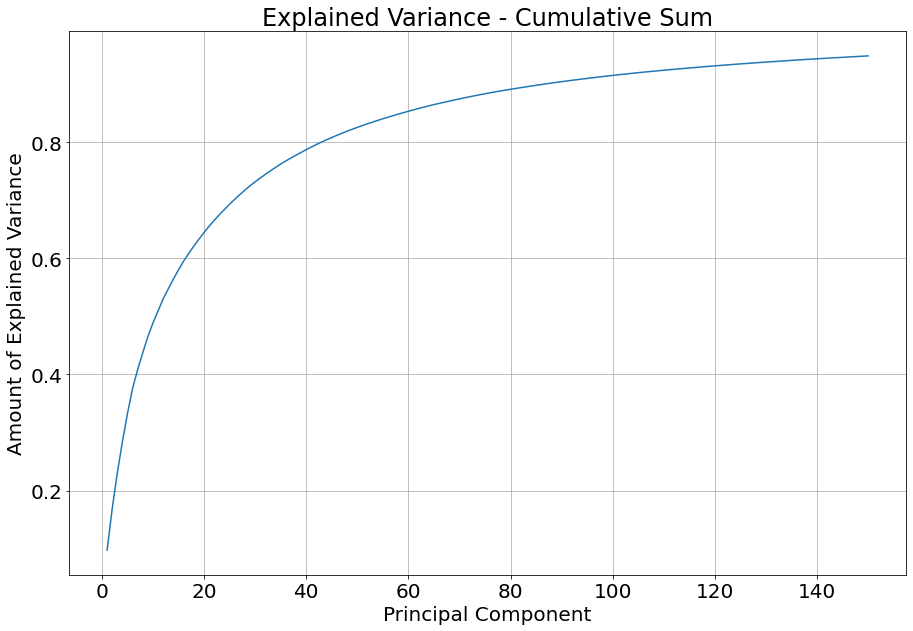

In [ ]:
# plot the cumulative sums
fig = plt.figure(figsize=(15, 10))
plt.rcParams["font.size"] = '20'
plt.title("Explained Variance - Cumulative Sum")
plt.xlabel("Principal Component")
plt.ylabel("Amount of Explained Variance")
plt.plot(pcaIndex[:PC_MAX], explainVarCumSum[:PC_MAX])
plt.grid()
#plt.show()

95% of the variance is explained after about 150 principal components

In [ ]:
# recheck how many principal components are need to explain 95% of the variance
print('The explained variances at about 120 principal components are:')
for aa in [150,151,152,153,154,155]:
  print('For principal component number',aa,'..., the explained variance =', explainVarCumSum[aa-1])

The explained variances at about 120 principal components are:
For principal component number 150 ..., the explained variance = 0.948598486622723
For principal component number 151 ..., the explained variance = 0.9490637832968537
For principal component number 152 ..., the explained variance = 0.9495251455550341
For principal component number 153 ..., the explained variance = 0.9499814820553452
For principal component number 154 ..., the explained variance = 0.9504332382633774
For principal component number 155 ..., the explained variance = 0.950882726845245


In [ ]:
# create dataframe consisting of first 150 principal components
eigVects_subset = eigVects_sorted[:, 0:PC_MAX]

In [ ]:
# transform the data 
X_pca = pd.DataFrame(np.dot(eigVects_subset.transpose(),Xdf_zeroMean.transpose()).transpose())
X_pca.shape

(42000, 150)

In [ ]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-661.595780,-699.311328,-183.282040,-120.611394,-81.081811,-489.461886,-683.470838,85.559387,-348.548052,202.978545,...,6.556633,10.655274,-0.570361,-3.101748,17.098436,-58.339249,15.823150,9.287011,-18.482726,18.520962
1,1701.451685,-360.551556,501.805594,-335.423656,-442.378933,-738.404049,653.875438,-176.600677,7.520175,67.846273,...,49.527338,11.980371,22.217856,1.523216,43.407014,-36.490962,40.980646,10.685122,66.221177,-32.294031
2,-886.894434,-293.765782,-67.155310,-78.263763,-473.715921,323.540638,437.799098,-305.377740,195.295503,-25.626023,...,52.191247,12.014242,-15.600304,-14.141331,13.881011,37.685988,29.352506,12.988891,-60.416378,-5.401996
3,-165.755602,300.182761,64.145485,-759.706261,-425.844379,-157.390337,-304.099140,276.408982,45.867215,-295.477581,...,-21.181190,92.032918,8.897473,77.030537,4.638871,68.182062,94.862181,15.622565,-96.264823,-47.647930
4,1923.709716,-449.153069,548.613023,-188.555147,-651.736273,-990.063824,564.507042,-255.915217,-124.914693,177.566843,...,6.660991,-44.664085,-21.169605,-36.481684,-50.838706,10.774927,10.032581,-22.560204,97.954665,75.819996


In [ ]:
X_pca.describe()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
count,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,...,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04
mean,1.007198e-13,-5.965852e-14,3.598899e-15,-7.421044e-14,2.222375e-14,-1.118232e-13,4.167976e-14,-1.421255e-14,-3.967738e-14,-3.142764e-14,...,2.957719e-15,1.093804e-14,1.070441e-14,7.764244e-15,-6.690775e-15,3.081556e-15,-4.304451e-15,1.687750e-15,8.742964e-15,1.916097e-15
std,5.786023e+02,4.958680e+02,4.594036e+02,4.297981e+02,4.099634e+02,3.844129e+02,3.354618e+02,3.151435e+02,3.082467e+02,2.840083e+02,...,4.233723e+01,4.189809e+01,4.164944e+01,4.143372e+01,4.124260e+01,4.111855e+01,4.078508e+01,4.045924e+01,4.037342e+01,4.008425e+01
min,-1.075118e+03,-1.415222e+03,-1.470522e+03,-1.563076e+03,-1.281908e+03,-1.273385e+03,-1.115398e+03,-1.069417e+03,-1.524829e+03,-1.015484e+03,...,-1.923493e+02,-2.107480e+02,-2.064675e+02,-2.008972e+02,-1.930292e+02,-1.905934e+02,-1.937403e+02,-2.233563e+02,-1.939243e+02,-1.764007e+02
25%,-4.018417e+02,-3.656712e+02,-3.183531e+02,-2.706142e+02,-2.750166e+02,-2.687992e+02,-2.411359e+02,-2.134494e+02,-2.094194e+02,-1.832523e+02,...,-2.696119e+01,-2.695677e+01,-2.643800e+01,-2.686223e+01,-2.643547e+01,-2.609811e+01,-2.617269e+01,-2.603556e+01,-2.562173e+01,-2.632987e+01
50%,-5.464735e+01,-8.132485e+01,-1.569858e+01,-5.766150e+00,1.030493e+01,-8.709778e+00,-1.535997e+01,-2.965585e+01,1.542545e+01,1.150785e+01,...,3.450301e-01,2.562755e-01,-3.520263e-01,-4.379504e-01,2.931603e-01,-3.823603e-01,-3.049217e-01,-1.324460e-02,2.014443e-01,-2.812095e-01
75%,3.364792e+02,3.834624e+02,3.268287e+02,3.076863e+02,2.789886e+02,2.642768e+02,2.276629e+02,1.992894e+02,2.214488e+02,1.995087e+02,...,2.745213e+01,2.674649e+01,2.606770e+01,2.598391e+01,2.687453e+01,2.577781e+01,2.630440e+01,2.584499e+01,2.614275e+01,2.561260e+01
max,2.389601e+03,1.483516e+03,1.407810e+03,1.519641e+03,1.354520e+03,1.234735e+03,1.269367e+03,1.184847e+03,1.093511e+03,1.031599e+03,...,1.848722e+02,1.883509e+02,2.141590e+02,2.407964e+02,1.651958e+02,2.230068e+02,2.066572e+02,2.067257e+02,2.213346e+02,1.763221e+02


In [ ]:
# recheck size of observation vector y
yDF.shape

(42000,)

------------------------------------------

**Fit the PCA-transformed data (using the same hyperparameters as used with raw data, maxFeatures = 'sqrt')**

In [ ]:
# list the parameters to be used and train model (max_features = None, PCA transformed training data)
nEstimators = 1800
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = 'sqrt'
bootstrapChoice = False
nJobs = -1

rfc = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice,
    n_jobs = nJobs
)
start=datetime.now()
rfcModel_pca = rfc.fit(X_pca, yDF)
end=datetime.now()
print('Time to train RandomForestModel (PCA-transformed training data; n_estimators=1800, max_features=sqrt) =', end-start)

Time to train RandomForestModel (PCA-transformed training data; n_estimators=1800, max_features=sqrt) = 0:25:11.831664


In [ ]:
# list the parameters to be used and train model (max_features = None, PCA transformed training data)
nEstimators = 1800
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = 'sqrt'
bootstrapChoice = False
nJobs = -1

rfc = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice,
    n_jobs = nJobs
)
start=datetime.now()
rfcModel_pca = rfc.fit(X_pca, yDF)
end=datetime.now()
print('Time to train RandomForestModel (PCA-transformed training data) =', end-start)

Time to train RandomForestModel (PCA-transformed training data) = 0:23:45.038015


Prepare the test dataset for PCA-transformed prediction

In [ ]:
# zero-mean the test data
Xtest_zeroMean = testDF - np.mean(testDF, axis=0)
Xtest_zeroMean.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.129262e-14,-3.317883e-15,-2.940809e-15,-1.111826e-15,3.688995e-17,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293e+00,3.616811e+00,1.813602e+00,1.205211e+00,8.074753e-01,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.646071e-01,-7.321429e-02,-2.803571e-02,-1.125000e-02,-6.535714e-03,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.646071e-01,-7.321429e-02,-2.803571e-02,-1.125000e-02,-6.535714e-03,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.646071e-01,-7.321429e-02,-2.803571e-02,-1.125000e-02,-6.535714e-03,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.646071e-01,-7.321429e-02,-2.803571e-02,-1.125000e-02,-6.535714e-03,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.528354e+02,2.539268e+02,1.929720e+02,1.869888e+02,1.189935e+02,0.0,0.0,0.0,0.0,0.0


In [ ]:
# calculate the covariance matrix of the mean-centered data.
cov_mat_test = np.cov(Xtest_zeroMean, rowvar = False)

# calculate the eigenvalues and eigenvectors
eigVals_test, eigVects_test = np.linalg.eig(cov_mat_test)

# use the real component
eigVals_test_real = eigVals_test.real
eigVects_test_real = eigVects_test.real

######################################
# should these be sorted using the same order as with the training data ???

# sort the eigenvalues in descending order
eigValSortedIndex_test = np.argsort(eigVals_test_real)[::-1]
eigValsTest_sorted = eigVals_test_real[eigValSortedIndex_test]

# sort the eigenvectors 
eigVectsTest_sorted = eigVects_test_real[:, eigValSortedIndex_test]
#######################################

# create dataframe consisting of first 150 principal components
eigVectsTest_subset = eigVectsTest_sorted[:, 0:PC_MAX]

# transform the data 
X_pca_test = pd.DataFrame(np.dot(eigVectsTest_subset.transpose(),Xtest_zeroMean.transpose()).transpose())
X_pca_test.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-842.929585,-144.673505,743.120839,-672.576463,386.203909,-489.514097,-205.567932,-84.884758,-314.762737,-337.060862,...,49.026529,60.020903,-7.461726,-0.208711,23.432329,30.193688,-106.111736,-38.257043,55.667624,23.636746
1,-1142.704681,-72.916156,252.570924,63.403051,-935.429941,-446.612824,-735.088271,243.589034,431.951739,-489.143069,...,39.579587,34.066699,-8.570057,55.221612,3.963267,26.357745,68.765372,-22.822624,-30.703682,-63.976138
2,498.188691,134.483438,173.832594,77.578581,-169.244286,-135.482181,329.223275,342.832828,-283.127288,414.895279,...,0.705963,-1.569584,-40.790734,11.495658,-3.444690,-20.714527,16.868607,-58.777981,-31.554403,84.652517
3,234.078452,611.345537,475.776747,-426.097326,-201.603505,-159.147356,78.190274,-121.051269,-104.354973,193.620329,...,6.989254,35.792113,58.588034,40.825871,-26.573456,-24.629301,24.660341,7.800221,-38.702770,26.265366
4,122.664936,-708.878598,2.083640,-153.177373,291.845879,-46.305894,-68.935099,-739.863253,-306.893580,27.604603,...,-29.776971,15.837142,1.130318,62.695406,47.823582,-20.836115,-20.726234,-19.006999,30.051029,65.980928


In [ ]:
X_pca_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
count,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,...,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04,2.800000e+04
mean,2.006573e-14,-4.379785e-14,-9.204574e-15,-4.875135e-14,-1.475493e-14,-8.918326e-15,-1.400581e-14,1.460419e-15,-4.355018e-14,-4.491239e-14,...,9.700938e-15,1.321102e-15,-2.904470e-15,-1.093221e-15,1.391075e-14,-4.140942e-15,4.582271e-15,1.740322e-15,-2.953828e-15,1.561240e-14
std,5.777262e+02,4.947436e+02,4.593896e+02,4.316416e+02,4.086845e+02,3.842476e+02,3.352259e+02,3.144769e+02,3.066389e+02,2.824814e+02,...,4.232567e+01,4.168925e+01,4.157485e+01,4.122528e+01,4.115322e+01,4.107041e+01,4.083583e+01,4.067161e+01,4.014529e+01,3.993401e+01
min,-2.337737e+03,-1.412516e+03,-1.427051e+03,-1.583574e+03,-1.316597e+03,-1.219340e+03,-1.245653e+03,-1.183853e+03,-1.069876e+03,-9.483924e+02,...,-2.132532e+02,-1.950925e+02,-2.304381e+02,-1.923290e+02,-2.089385e+02,-1.867580e+02,-1.870312e+02,-1.908685e+02,-1.992978e+02,-1.825758e+02
25%,-3.325581e+02,-3.617217e+02,-3.254989e+02,-2.737328e+02,-2.779291e+02,-2.650024e+02,-2.237416e+02,-1.976138e+02,-2.169143e+02,-1.997883e+02,...,-2.704063e+01,-2.663416e+01,-2.653604e+01,-2.627465e+01,-2.606084e+01,-2.601412e+01,-2.656051e+01,-2.588962e+01,-2.509558e+01,-2.553572e+01
50%,4.233021e+01,-8.267926e+01,1.906068e+01,-3.390278e+00,8.614262e+00,-1.408017e+01,1.867102e+01,3.170844e+01,-1.199054e+01,-1.302765e+01,...,-2.116603e-02,6.494322e-02,7.562238e-01,-2.457953e-01,-5.268807e-02,-4.163874e-02,4.004779e-01,-1.400720e-01,-4.426325e-02,-2.224336e-01
75%,3.955280e+02,3.854676e+02,3.211183e+02,3.113819e+02,2.791302e+02,2.603049e+02,2.357279e+02,2.096920e+02,2.071973e+02,1.772280e+02,...,2.669796e+01,2.637082e+01,2.705433e+01,2.589333e+01,2.603832e+01,2.584804e+01,2.676498e+01,2.629416e+01,2.547948e+01,2.532139e+01
max,1.086954e+03,1.374876e+03,1.458407e+03,1.523216e+03,1.397441e+03,1.211210e+03,9.662685e+02,1.141357e+03,1.273274e+03,9.756361e+02,...,2.433491e+02,2.196024e+02,2.013632e+02,2.164530e+02,2.425406e+02,1.903516e+02,1.866417e+02,1.956262e+02,1.920682e+02,2.037580e+02


Try training and testing using the max_feature='sqrt' PCA model

In [ ]:
# predict digits using trained Random Forest model (max_features='sqrt'; n_estimators=1800; PCA-trained model)

start=datetime.now()
yTestPredict = rfcModel_pca.predict(X_pca_test)
end=datetime.now()
print('Time to test RandomForestModel (original data) =', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_rawData = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_rawData['ImageId'] = np.arange(start=1, stop=len(digitDF_rawData)+1, step=1)
digitDF_rawData['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_rawData.to_csv('Digit_PCA_1800sqrt.csv', index=False)

Time to test RandomForestModel (original data) = 0:00:14.148467


In [ ]:
# predict digits using trained Random Forest model (max_features = 'sqrt', PCA-trained model)

start=datetime.now()
yTestPredict = rfcModel_pca.predict(X_pca_test)
end=datetime.now()
print('Time to test RandomForestModel (original data) =', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_rawData = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_rawData['ImageId'] = np.arange(start=1, stop=len(digitDF_rawData)+1, step=1)
digitDF_rawData['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_rawData.to_csv('Digit_PCA_sqrt.csv', index=False)

Time to test RandomForestModel (original data) = 0:00:16.059986


--------------------------------------------------------------------

(... additional Random Search runs)

In [ ]:
# use RandomSearchCV to search for hyperparameter values

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 1800, num = 4)]
n_estimators = [600, 1000, 1200]

# which criterion to decide whether to split
criterion = ['gini','entropy']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)
max_depth = [14,20,26]

# Minimum number of samples required to split a node
min_samples_split = [4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Number of features to consider at every split
max_features = ['sqrt']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

# verify grid parameters
print('These are the parameter ranges:\n')
pprint(random_grid)

These are the parameter ranges:

{'bootstrap': [False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [14, 20, 26],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [4],
 'n_estimators': [600, 1000, 1200]}


In [ ]:
# use the random grid to search for best hyperparameters

# create the base model to tune
rfc = RandomForestClassifier(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10,
                               cv = 3, verbose=2, random_state=123)

# Fit the random search model
rfc_random.fit(X_pca, yDF)

# view the best parameters obtained from above search:
print('The best parameters obtained from the random search are:\n',rfc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time= 5.2min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time= 5.1min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time= 5.1min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=10.3min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=10.3min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=10.2min
[CV] END bootstrap

In [ ]:
# use RandomSearchCV results above to refine search for hyperparameter values

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 1800, num = 4)]
n_estimators = [700, 800, 900, 1000, 1100]

# which criterion to decide whether to split
criterion = ['gini']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
#max_depth.append(None)
max_depth = [26,28]

# Minimum number of samples required to split a node
min_samples_split = [4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Number of features to consider at every split
max_features = ['sqrt']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

# verify grid parameters
print('These are the parameter ranges:\n')
pprint(random_grid)

These are the parameter ranges:

{'bootstrap': [False],
 'criterion': ['gini'],
 'max_depth': [26, 28],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [4],
 'n_estimators': [700, 800, 900, 1000, 1100]}


In [ ]:
# use the random grid to search for best hyperparameters

# create the base model to tune
rfc = RandomForestClassifier(n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 20,
                               cv = 3, verbose=2, random_state=123)

# Fit the random search model
rfc_random.fit(X_pca, yDF)

# view the best parameters obtained from above search:
print('The best parameters obtained from the random search are:\n',rfc_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 6.3min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 6.2min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time= 6.2min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time= 7.0min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time= 7.0min
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time= 7.0min
[CV] END bootstrap=Fa

**After changing max_features = None, the execution kept stopping before code was completed; therefore, use smaller number of estimators (n_estimators = 1000)**

In [ ]:
# list the parameters to be used and train model (max_features = None, PCA transformed training data)
nEstimators = 1000
criterionChoice = 'gini'
maxDepth = 26
minSamplesSplit = 4
minSamplesLeaf = 1
maxFeatures = None
bootstrapChoice = False
nJobs = -1

rfc = RandomForestClassifier(
    n_estimators = nEstimators,
    criterion = criterionChoice,
    max_depth = maxDepth,
    min_samples_split = minSamplesSplit,
    min_samples_leaf = minSamplesLeaf,
    max_features = maxFeatures,
    bootstrap = bootstrapChoice,
    n_jobs = nJobs
)
start=datetime.now()
rfcModel_pca_None = rfc.fit(X_pca, yDF)
end=datetime.now()
print('Time to train RandomForestModel (PCA-transformed training data, n_estimators=1800; max_features=None) =', end-start)

#----------------------------------------------------------
# predict digits using trained Random Forest model (max_features = 'sqrt', PCA-trained model)

start=datetime.now()
yTestPredict = rfcModel_pca_None.predict(X_pca_test)
end=datetime.now()
print('Time to test RandomForestModel (PCA-transformed training data, n_estimators=1800; max_features=None) =', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_PCA = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_PCA['ImageId'] = np.arange(start=1, stop=len(digitDF_PCA)+1, step=1)
digitDF_PCA['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_PCA.to_csv('Digit_PCA_1800None.csv', index=False)

Time to train RandomForestModel (PCA-transformed training data, n_estimators=1800; max_features=None) = 3:33:23.802192
Time to test RandomForestModel (PCA-transformed training data, n_estimators=1800; max_features=None) = 0:00:07.068770


NameError: ignored

In [ ]:
# predict digits using trained Random Forest model (max_features = 'sqrt', PCA-trained model)

start=datetime.now()
yTestPredict = rfcModel_pca_None.predict(X_pca_test)
end=datetime.now()
print('Time to test RandomForestModel (PCA-transformed training data, n_estimators=1800; max_features=None) =', end-start)

# create dataframe with proper format for submittal to Kaggle.com
digitDF_PCA = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_PCA['ImageId'] = np.arange(start=1, stop=len(digitDF_PCA)+1, step=1)
digitDF_PCA['Label'] = yTestPredict

# save as csv file (see Colab files folder)
digitDF_PCA.to_csv('Digit_PCA_1800None.csv', index=False)

Time to test RandomForestModel (PCA-transformed training data, n_estimators=1800; max_features=None) = 0:00:07.366200


==================================================================================================

# k-MEANS DIMENSIONALITY REDUCTION PRIOR TO RANDOM FOREST CLASSIFICATION

For convenience, beginning code is repeated here ...

(package imports still have to be obtained at the top of this notebook)

In [ ]:
# get training data
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [ ]:
origDF = pd.read_csv('train.csv')

In [ ]:
print('Training Data: {}'.format(origDF.shape))
# print('Training Labels: {}'.format(y_train.shape)

Training Data: (42000, 785)


In [ ]:
# extract response variable ('label') from dataset
yDF = origDF['label']
Xdf = origDF.copy()
Xdf = Xdf.drop(columns=['label'], axis=1)

The k-means clustering code below was adapted from the code at the link provided in class:

 https://github.com/xoraus/K-Means-Clustering-for-Imagery-Analysis

In [ ]:
# convert each image to 1 dimensional array
Xdf = np.array(Xdf)
X = Xdf.reshape(len(Xdf),-1)
Y = np.array(yDF)

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(42000, 784)
(784,)


In [ ]:
# MiniBatchKMeans is useful with large data sets (batch processing)
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# function to assign clusters to the possible digit labels
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    # initialize an empty dictionary to store the clusters assigned to each digit label
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:

            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

In [ ]:
# function to assign labels to arrays based upon the cluster they were assigned to
def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # initialize empty array to store predicted digit labels
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
# function to print out the k-means metrics
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [ ]:
from matplotlib.transforms import interval_contains
# given there are 10 digits (0, 1, 2, ..., 9), start with k=10 but also try
#   higher values for k in case numbers can be represented by multiple clusters;
#   calculate and print out accuracy score for each value of k

clusters = [10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 110,
            125, 140, 165, 190, 205, 220, 240, 260, 285, 310, 340, 400]

# initialize storage lists
inertia = [0] * len(clusters)
homogeneity = [0] * len(clusters)
accuracy = [0] * len(clusters)

# test different numbers of clusters
for i in range(len(clusters)):

    estimator = MiniBatchKMeans(n_clusters = clusters[i])
    estimator.fit(X)
    
    # calculate cluster metrics
    inertia[i] = estimator.inertia_
    homogeneity[i] = metrics.homogeneity_score(Y, estimator.labels_)

    print('Number of clusters =', estimator.n_clusters)
    print('Inertia =', estimator.inertia_)
    print('Homogeneity =', metrics.homogeneity_score(Y, estimator.labels_))
    
    # set digit labels for each cluster 
    cluster_labels = infer_cluster_labels(estimator, Y)

    # assign digit labels to image samples based upon which cluster assigned to 
    predY = infer_data_labels(estimator.labels_, cluster_labels)
    
    accuracy[i] = metrics.accuracy_score(Y, predY)

    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predY)))

Number of clusters = 10
Inertia = 1651044.43437632
Homogeneity = 0.4715554495381136
Accuracy: 0.569

Number of clusters = 20
Inertia = 1494979.0483573666
Homogeneity = 0.5927768485568111
Accuracy: 0.6840952380952381

Number of clusters = 25
Inertia = 1441520.5215557935
Homogeneity = 0.6488178646378504
Accuracy: 0.7437142857142857

Number of clusters = 30
Inertia = 1407749.6800639087
Homogeneity = 0.6727122845686241
Accuracy: 0.7522857142857143

Number of clusters = 35
Inertia = 1377601.570541964
Homogeneity = 0.6736170650405973
Accuracy: 0.732547619047619

Number of clusters = 40
Inertia = 1348881.8305233477
Homogeneity = 0.6827598684773005
Accuracy: 0.7478095238095238

Number of clusters = 45
Inertia = 1323824.123240618
Homogeneity = 0.7114378545142991
Accuracy: 0.7882857142857143

Number of clusters = 50
Inertia = 1306694.4537665704
Homogeneity = 0.7364263764037828
Accuracy: 0.8148333333333333

Number of clusters = 55
Inertia = 1286401.9596213559
Homogeneity = 0.7372939608701121
Accu

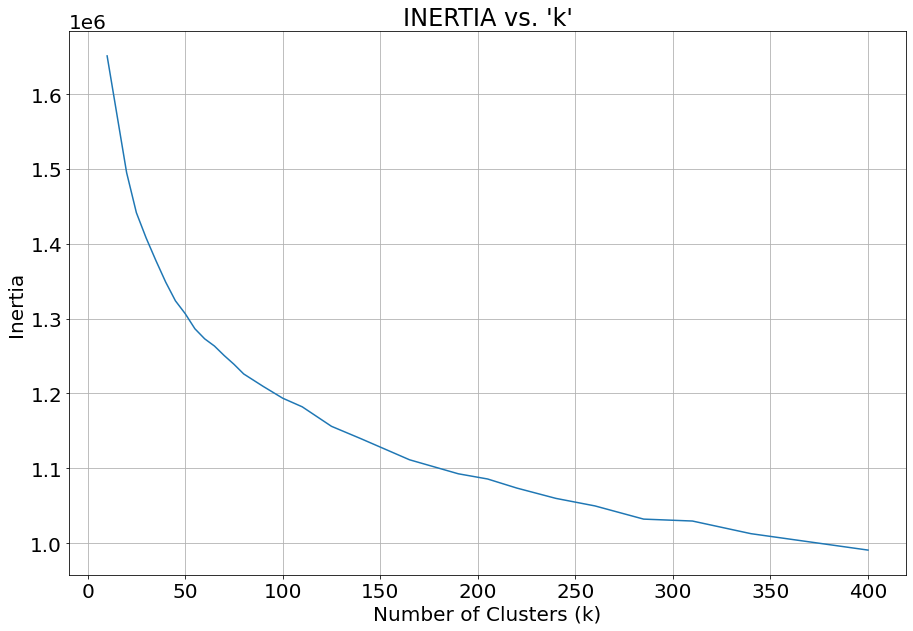

In [ ]:
# plot INERTIA
fig = plt.figure(figsize=(15, 10))
plt.rcParams["font.size"] = '20'
plt.title("INERTIA vs. 'k'")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.plot(clusters, inertia)
plt.grid()

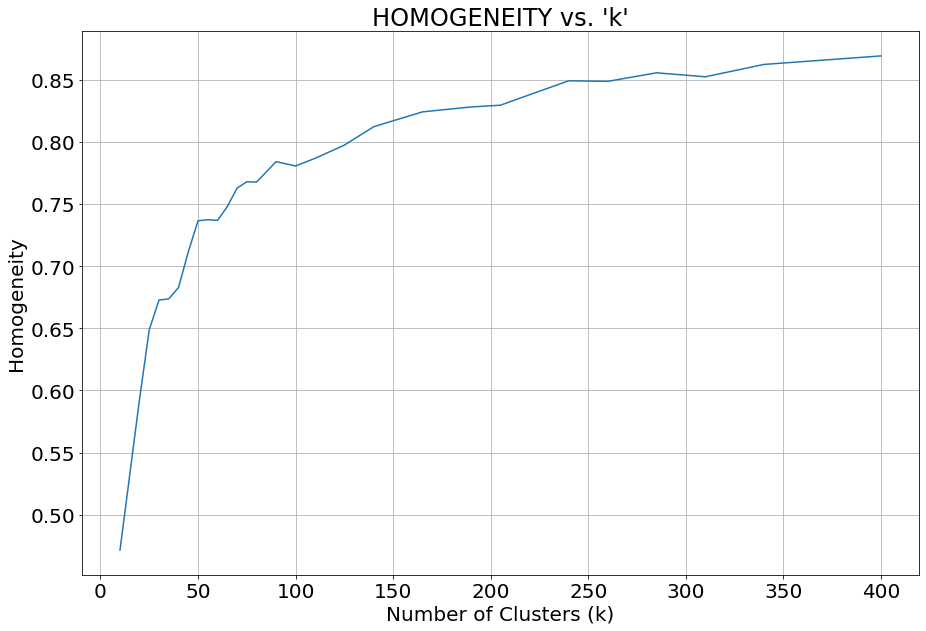

In [ ]:
# plot HOMOGENEITY
fig = plt.figure(figsize=(15, 10))
plt.rcParams["font.size"] = '20'
plt.title("HOMOGENEITY vs. 'k'")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Homogeneity")
plt.plot(clusters, homogeneity)
plt.grid()

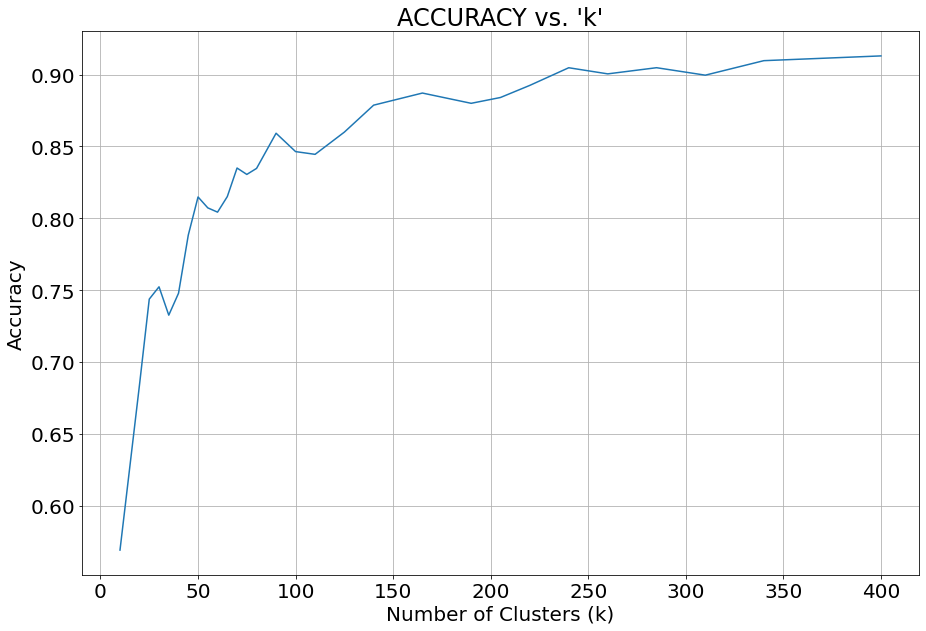

In [ ]:
# plot ACCURACY
fig = plt.figure(figsize=(15, 10))
plt.rcParams["font.size"] = '20'
plt.title("ACCURACY vs. 'k'")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Accuracy")
plt.plot(clusters, accuracy)
plt.grid()

Based upon above charts, there is little improvement after k=250

In [ ]:
# create k-means clusters with k=250
K = 250

# initialize and fit KMeans algorithm on training data;
#  this creates 'K' clusters, where each cluster is assigned a cluster number,
#  where the cluster numbers are stored as an int32 array, MiniBatchKMeans.labels_
#  (in this case, kmeans.labels_)
kmeans = MiniBatchKMeans(n_clusters = K)
kmeans.fit(X)

# create a dictionary {digit : [list of corresponding cluster numbers]}, where the
#   digits are from 0-9, and cluster numbers range from 0 to K
digit_clusterNum_Dict = infer_cluster_labels(kmeans, Y)

In [ ]:
# load test.csv data
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [ ]:
testDF = pd.read_csv('test.csv')

In [ ]:
# convert each test image to 1 dimensional array
Xtest = np.array(testDF)
Xtest = Xtest.reshape(len(Xtest),-1)

# normalize the data to 0 - 1
Xtest = Xtest.astype(float) / 255.

print(Xtest.shape)
print(Xtest[0].shape)

(28000, 784)
(784,)


In [ ]:
# go thru the test image samples, and assign them to one of the clusters based upon euclidean distance;
#   note that MiniBatchKMeans has attribute MiniBatchKMeans.cluster_centers_ 
#  (an ndarray of shape (n_clusters, n_features))

# initialize a list to store cluster numbers for each Xtest image sample
clusterNums_test = [0] * len(Xtest)

# go thru the Xtest image samples
for aa in range(len(Xtest)):

  #print('Analyzing test image number',aa,'of',len(Xtest))
  imgArray = Xtest[aa]

  # initialize the minimum distance squared with the first cluster
  minDist2 = sum((kmeans.cluster_centers_[0] - imgArray)**2)
  clusterNums_test[aa] = kmeans.labels_[0]

  # go thru the rest of the kmeans clusters to see if sample should be assigned to that cluster
  for bb in range(1,K):

    testDist2 = sum((kmeans.cluster_centers_[bb] - imgArray)**2)
    if testDist2 < minDist2:
      minDist2 = testDist2
      clusterNums_test[aa] = kmeans.labels_[bb]

In [ ]:
# given the test sample have been assigned to the different clusters,
#  add the cluster numbers to their corresponding image samples
testDFa = testDF.copy()
testDFa['ClusterNumber'] = clusterNums_test
testDFa.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ClusterNumber,Digit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,199,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,224,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,221,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,168,0


In [ ]:
# given the image samples have been assigned to a cluster and given the cluster number,
#   find and assign the corresponding digit that goes with that cluster number

digitList = [0] * len(testDF)  # initialize list with zeros
for aa in range(len(testDF)):

  imageClusterNo = testDF.iloc[aa].ClusterNumber
  for key in digit_clusterNum_Dict.keys():
    possibleClusterNums = digit_clusterNum_Dict[key]

    if imageClusterNo in possibleClusterNums:
      digitList[aa] = key
      
testDF['Digit'] = digitList
testDF.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ClusterNumber,Digit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,199,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,224,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,221,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,168,2


In [ ]:
# create dataframe with proper format for submittal to Kaggle.com
digitDF_kMeans = pd.DataFrame(index=np.arange(len(testDF)), columns=['ImageId', 'Label'])
digitDF_kMeans['ImageId'] = np.arange(start=1, stop=len(digitDF_kMeans)+1, step=1)
digitDF_kMeans['Label'] = testDF.Digit

# save as csv file (see Colab files folder)
digitDF_kMeans.to_csv('Digit_kMeans.csv', index=False)

#SUMMARY

**RAW DATA MODELING**

Time to perform modeling and testing using raw training data are as follows:

Time to train RandomForestModel (original data), n_estimators=1800 and n_features=None:  4:09:45.798057

Time to test RandomForestModel (original data), n_estimators=1800 and n_features=None:  0:00:15.101315

Kaggle.com submission score is as follows:

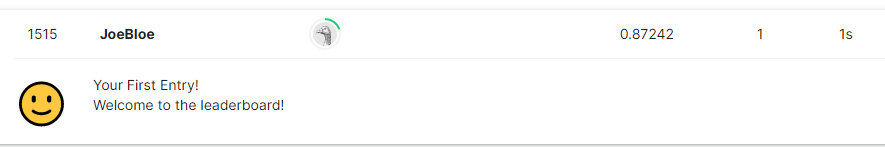

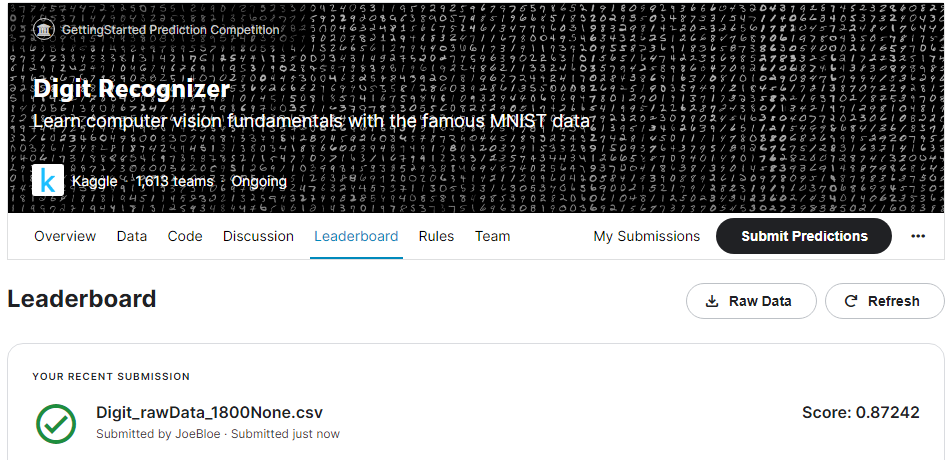






**PCA-TRANSFORMED MODELING**

After PCA-transformation of the data, only 150 principal components were needed to explain 95% of the variance.

Time to train RandomForestModel (PCA-transformed training data, n_estimators=1000; max_features=None) = 3:33:23.802192

Time to test RandomForestModel (PCA-transformed training data, n_estimators=1000; max_features=None) = 0:00:07.068770

Unfortunately, my PCA-transformed RandomForest version did not perform as well as the version using raw data and I was not able to fix it due to time limitations.

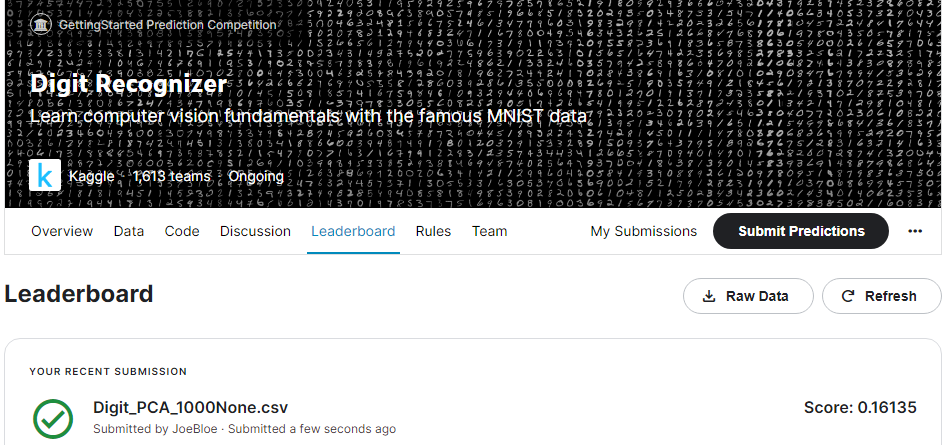

**k-MEANS APPROACH FOR MODELING**

In the k-means approach, approximately 90% accuracy could be obtained with 250 clusters, so k=250 was chosen as the value for k. Unfortunately, this was obtained using training data and my Kaggle.com score was not as good as my original, raw-data, RandomForest score.

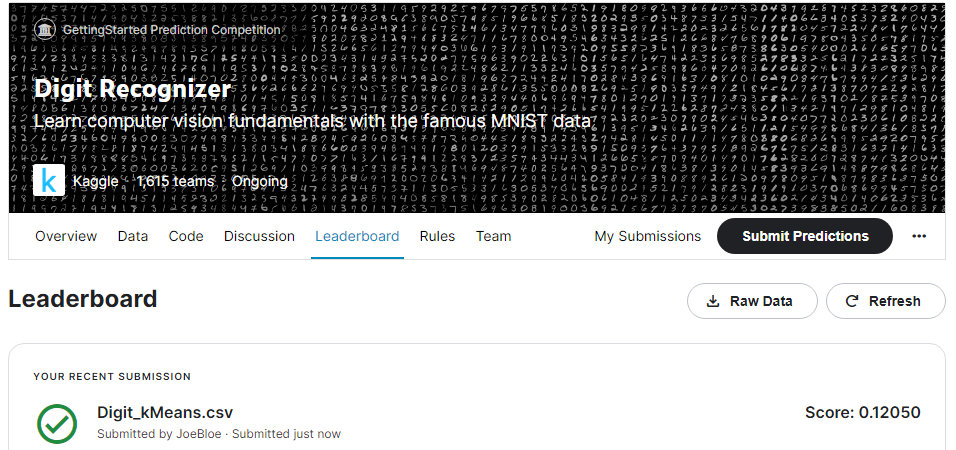

In summary, in this assignment, we explored several classification approaches for a multi-class problem involving digit recognition.  There were issues with my PCA and k-means approaches, and I will have to investigate in the future why these approaches did not perform as well as my basic, raw data approach.